# NamedHist

## Setup

In [1]:
import hist
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp

## Initialization

In [2]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

NamedHist(
  Regular(50, -3, 3, metadata={'name': 'x', 'title': None}),
  Regular(50, -3, 3, metadata={'name': 'y', 'title': None}),
  storage=Double()) # Sum: 974507.0 (1000000.0 with flow)

## Matplotlib

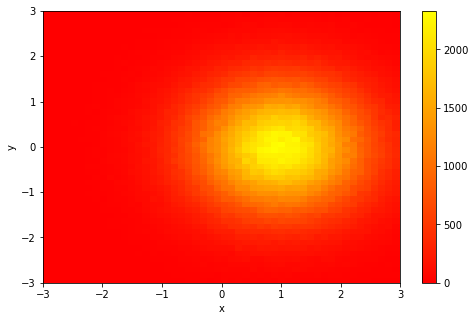

In [3]:
fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
plt.show()

## Plot

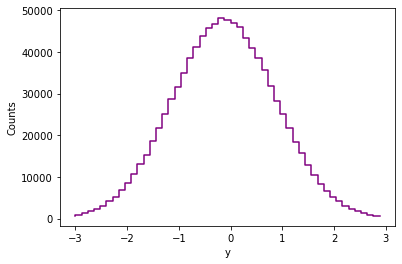

In [4]:
fig = plt.figure(figsize=(6, 4))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

ax = fig.add_subplot(grid[:, :])

fig, ax = h.project("y").plot1d(fig, ax, c="purple")
plt.show()

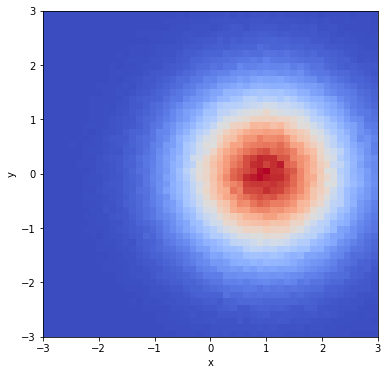

In [5]:
fig = plt.figure(figsize=(6, 6))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

ax = fig.add_subplot(grid[:, :])

fig, ax = h.plot2d(fig, ax, cmap="coolwarm")
plt.show()

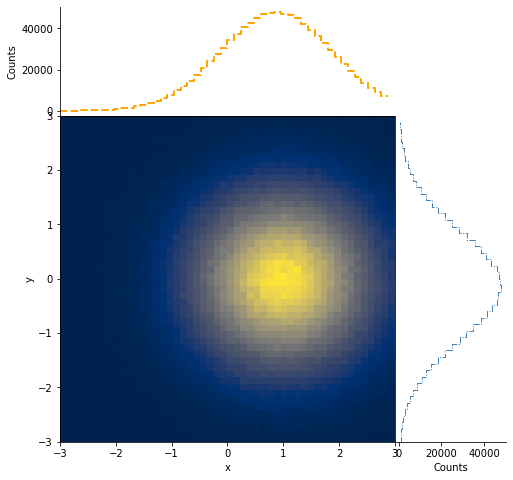

In [6]:
h.plot2d_full(main_cmap="cividis", top_ls="--", top_color="orange", top_lw=2, 
                         side_ls="-.", side_lw=1, side_color="steelblue")

plt.show()

In [7]:
h = hist.NamedHist(
    hist.axis.Regular(100, -1, 1, name="X"),
    hist.axis.Regular(100, -1, 1, name="Y"),
    hist.axis.Boolean(name="V"),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = np.abs(x)**2 + (y + .2 - np.power(np.abs(x), 2/3))**2 < .5
h.fill(Y=y, X=x, V=valid)

valid_only = h[{'V':bh.loc(True)}]   # this will cause dimentionality reduction

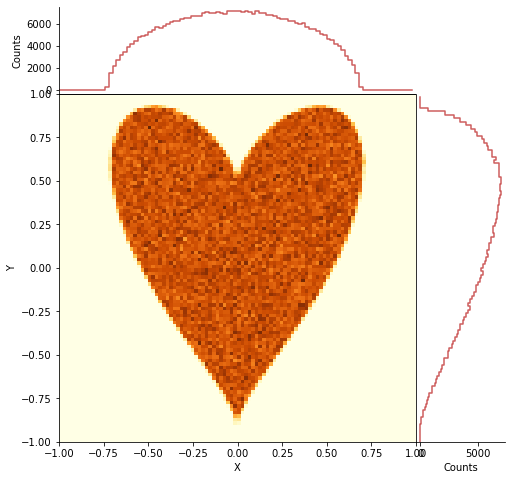

In [8]:
fig = plt.figure(figsize=(8, 8))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

main_ax = fig.add_subplot(grid[1:5, 0:4])
top_ax = fig.add_subplot(grid[0:1, 0:4], sharex=main_ax)
side_ax = fig.add_subplot(grid[1:5, 4:5], sharey=main_ax)

fig, main_ax, top_ax, side_ax = valid_only.plot2d_full(fig, main_ax, top_ax, side_ax,
                                               main_cmap="YlOrBr", top_color="indianred",
                                               side_color="indianred")
plt.show()

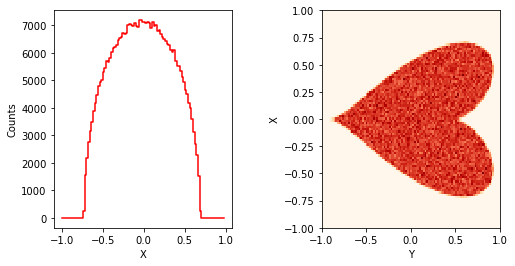

In [9]:
fig = plt.figure(figsize=(8, 4))
grid = fig.add_gridspec(10, 10, hspace=0, wspace=0)

ax1 = fig.add_subplot(grid[:, 0:4])
ax2 = fig.add_subplot(grid[:, 6:])

valid_only.project("X").plot(fig, ax1, c="red")
valid_only.project("Y", "X").plot(fig, ax2, cmap="OrRd")
plt.show()

## Plot Pull

In [10]:
def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp
    return a * exp(-(x-x0)**2/(2*sigma**2)) + offset

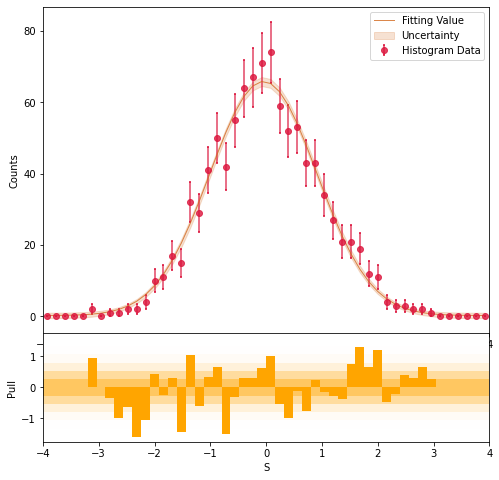

In [11]:
h = hist.NamedHist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)

h.fill(S=data)

h.plot_pull(pdf, eb_ecolor='crimson', eb_mfc='crimson', eb_mec='crimson', eb_fmt='o', eb_ms=6,\
                eb_capsize=1, eb_capthick=2, eb_alpha=.8, vp_c='orange', vp_ls='-', vp_lw=2,\
                vp_alpha=.8, fp_c='chocolate', fp_ls='-', fp_lw=1, fp_alpha=.8, bar_fc='orange',\
                pp_num=6, pp_fc='orange', pp_alpha=.618, pp_ec=None, ub_alpha=.2)

plt.show()

## Counter Examples

In [12]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="_x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: Name should be a valid Python identifier

In [13]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: Each axes in the NamedHist instance should have a name

In [14]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="y"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

Exception: NamedHist instance cannot contain axes with duplicated names.

In [15]:
h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="z"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)

ValueError: The axis names could not be found